In [262]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
import scikit_posthocs as sp
import sys

from mpl_toolkits.mplot3d import axes3d

In [263]:
AllName="dataG.pkl"
ResizesName="dataM.pkl"
NameExtension=".pkl"
n_cores=20
repet = 5 #CAMBIAR EL NUMERO SEGUN NUMERO DE EJECUCIONES POR CONFIG

significance_value = 0.05
processes = [2,20,40,80,160]

positions = [321, 322, 323, 324, 325]
positions_small = [221, 222, 223, 224]

labels = ['(1,10)',   '(1,20)',   '(1,40)',  '(1,80)',  '(1,120)','(1,160)',
            '(10,1)', '(10,20)',  '(10,40)', '(10,80)', '(10,120)','(10,160)',
            '(20,1)', '(20,10)',  '(20,40)', '(20,80)', '(20,120)','(20,160)',
            '(40,1)', '(40,10)',  '(40,20)', '(40,80)', '(40,120)','(40,160)',
            '(80,1)', '(80,10)',  '(80,20)', '(80,40)', '(80,120)','(80,160)',
            '(120,1)','(120,10)', '(120,20)','(120,40)','(120,80)','(120,160)',
            '(160,1)','(160,10)', '(160,20)','(160,40)','(160,80)','(160,120)']

labelsExpand = ['(1,10)',   '(1,20)',   '(1,40)',  '(1,80)',  '(1,120)','(1,160)',
            '(10,20)',  '(10,40)', '(10,80)', '(10,120)','(10,160)',
            '(20,40)', '(20,80)', '(20,120)','(20,160)',
            '(40,80)', '(40,120)','(40,160)',
            '(80,120)','(80,160)',
            '(120,160)']
labelsShrink = ['(10,1)', 
            '(20,1)', '(20,10)',
            '(40,1)', '(40,10)',  '(40,20)',
            '(80,1)', '(80,10)',  '(80,20)', '(80,40)',
            '(120,1)','(120,10)', '(120,20)','(120,40)','(120,80)',
            '(160,1)','(160,10)', '(160,20)','(160,40)','(160,80)','(160,120)']

#                       WORST        BEST
labels_dist = ['null', 'SpreadFit', 'CompactFit']
                  #0          #1                #2                        #3
labelsMethods = ['Baseline', 'Baseline single','Baseline - Asynchronous','Baseline single - Asynchronous',
                 'Merge','Merge single','Merge - Asynchronous','Merge single - Asynchronous']
                  #4      #5             #6                     #7
    
colors_m = ['green','darkgreen','red','darkred','mediumseagreen','seagreen','palegreen','springgreen','indianred','firebrick','darkgoldenrod','saddlebrown']
linestyle_m = ['-', '--', '-.', ':']
markers_m = ['.','v','s','p', 'h','d','X','P','^']

OrMult_patch = mpatches.Patch(hatch='', facecolor='green', label='Baseline')
OrSing_patch = mpatches.Patch(hatch='', facecolor='springgreen', label='Baseline single')
OrPthMult_patch = mpatches.Patch(hatch='//', facecolor='blue', label='Baseline - Asyncrhonous')
OrPthSing_patch = mpatches.Patch(hatch='\\', facecolor='darkblue', label='Baseline single - Asyncrhonous')
MergeMult_patch = mpatches.Patch(hatch='||', facecolor='red', label='Merge')
MergeSing_patch = mpatches.Patch(hatch='...', facecolor='darkred', label='Merge single')
MergePthMult_patch = mpatches.Patch(hatch='xx', facecolor='yellow', label='Merge - Asyncrhonous')
MergePthSing_patch = mpatches.Patch(hatch='++', facecolor='olive', label='Merge single - Asyncrhonous')

handles_spawn = [OrMult_patch,OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergeSing_patch,MergePthMult_patch,MergePthSing_patch]

In [264]:
dfG = pd.read_pickle( AllName )

dfG['ADR'] = round((dfG['ADR'] / dfG['DR']) * 100,1)
dfG['SDR'] = round((dfG['SDR'] / dfG['DR']) * 100,1)
       
out_group = dfG.groupby(['Groups', 'ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy'])['T_total']
group = dfG.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','Groups'])['T_total']

grouped_aggG = group.agg(['median'])
grouped_aggG.rename(columns={'median':'T_total'}, inplace=True) 

out_grouped_G = out_group.agg(['median'])
out_grouped_G.rename(columns={'median':'T_total'}, inplace=True) 

In [265]:
dfM = pd.read_pickle( ResizesName )

dfM['ADR'] = round((dfM['ADR'] / dfM['DR']) * 100,1)
dfM['SDR'] = round((dfM['SDR'] / dfM['DR']) * 100,1)
dfM['T_Redistribution'] = dfM['T_SR'] + dfM['T_AR']
dfM.loc[dfM['T_Malleability']==0,'T_Malleability'] = dfM['T_spawn'] + dfM['T_Redistribution']
#dfM['T_Malleability'] = dfM['T_spawn'] + dfM['T_Redistribution'] #TODO Borrar esta linea
       
out_group = dfM.groupby(['NP','NC','ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy'])['T_Malleability','T_Redistribution','T_spawn','T_SR','T_AR']
group = dfM.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','NC'])['T_Malleability','T_Redistribution','T_spawn','T_SR','T_AR']

grouped_aggM = group.agg(['median'])
grouped_aggM.columns = grouped_aggM.columns.get_level_values(0)

out_grouped_M = out_group.agg(['median'])
out_grouped_M.columns = out_grouped_M.columns.get_level_values(0)

/tmp/ipykernel_711407/1991315790.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  out_group = dfM.groupby(['NP','NC','ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy'])['T_Malleability','T_Redistribution','T_spawn','T_SR','T_AR']
/tmp/ipykernel_711407/1991315790.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = dfM.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','NC'])['T_Malleability','T_Redistribution','T_spawn','T_SR','T_AR']


In [266]:
from bt_scheme import PartialSolution, BacktrackingSolver
def elegirConf(parameters):
    class StatePS(PartialSolution):
        def __init__(self, config):
            self.config= config
            self.n= len(config) #Indica el valor a añadir

        def is_solution(self):
            return self.n == len(parameters)

        def get_solution(self):
            return tuple(self.config)

        def successors(self):
            array = parameters[self.n]
            for parameter_value in array: #Test all values of the next parameter
                self.config.append(parameter_value)
                yield StatePS(self.config)
                self.config.pop()

    initialPs= StatePS([])
    return BacktrackingSolver().solve(initialPs)


def obtenerConfs(parameters):
    soluciones=[]
    for solucion in elegirConf(parameters):
        soluciones.append(solucion)
    return soluciones

def modifyToGlobal(parameters, len_parameters, configuration):
    usable_configuration = []
    for i in range(len(parameters)):
        if len_parameters[i] > 1:
            aux = (parameters[i][0], configuration[i])
        else:
            aux = (configuration[i])
        usable_configuration.append(aux)
        
    return usable_configuration

def modifyToLocalDynamic(parameters, len_parameters, configuration):
    usable_configuration = []
    for i in range(len(parameters)):
        if len_parameters[i] > 1:
            aux = (configuration[i], -1)
        else:
            aux = (-1)
        usable_configuration.append(aux)
        
    return tuple(usable_configuration)

def CheckConfExists(configuration, dataSet, type_conf='global'):
    exists = False
    config = list(configuration)
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                
                if type_conf == 'global':
                    config.append((np_aux, ns_aux))
                elif type_conf == 'malleability':
                    config.append(np_aux)
                    config.append(ns_aux)
                elif type_conf == 'local':
                    config.append(np_aux)
                    
                if tuple(config) in dataSet.index:     
                    exists = True # FIXME Return here true?
                config.pop()
                
                if type_conf == 'malleability':
                    config.pop()
    return exists

In [267]:
adr = [0,99.8]
sp_method = [0,1]
rd_method = [0,1]
rd_strat  = [0,1]
parameters = [adr, sp_method, rd_method, rd_strat]
parameters_names = ['ADR', 'Spawn_Method', 'Redistribution_Method', 'Redistribution_Strategy']
len_parameters = [1,2,2,2]
configurations_aux = obtenerConfs(parameters)
configurations = []
configurations_simple = []
for checked_conf in configurations_aux:
    aux_conf = modifyToGlobal(parameters, len_parameters, checked_conf)
    if CheckConfExists(aux_conf, grouped_aggG):
        configurations.append(aux_conf)

    if CheckConfExists(checked_conf, grouped_aggM, 'malleability'):
        configurations_simple.append(list(checked_conf))

print(configurations_simple)
print(configurations)
print(len(configurations))

[[0, 1, 0, 0], [99.8, 1, 0, 0]]
[[0, (0, 1), (0, 0), (0, 0)], [99.8, (0, 1), (0, 0), (0, 0)]]
2


In [272]:
#ALPHA COMPUTATION
def compute_alpha(config_a, config_b):
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                config_a.append(np_aux)
                config_a.append(ns_aux)
                config_b.append(np_aux)
                config_b.append(ns_aux)
                grouped_aggM.loc[tuple(config_b),'Alpha'] = grouped_aggM.loc[tuple(config_b),'T_Malleability'] / grouped_aggM.loc[tuple(config_a),'T_Malleability']
                #grouped_aggM.loc[tuple(config_b),'Alpha'] = grouped_aggM.loc[tuple(config_b),'T_Redistribution'] / grouped_aggM.loc[tuple(config_a),'T_Redistribution']
                config_a.pop()
                config_a.pop()
                config_b.pop()
                config_b.pop()
                
                
                config_a.insert(0,ns_aux)
                config_a.insert(0,np_aux)
                config_b.insert(0,ns_aux)
                config_b.insert(0,np_aux)
                out_grouped_M.loc[tuple(config_b),'Alpha'] = out_grouped_M.loc[tuple(config_b),'T_Malleability'] / out_grouped_M.loc[tuple(config_a),'T_Malleability']
                #out_grouped_M.loc[tuple(config_b),'Alpha'] = out_grouped_M.loc[tuple(config_b),'T_Redistribution'] / out_grouped_M.loc[tuple(config_a),'T_Redistribution']
                
                config_a.pop(0)
                config_a.pop(0)
                config_b.pop(0)
                config_b.pop(0)

if not ('Alpha' in grouped_aggM.columns):
    for config_a in configurations_simple:
        for config_b in configurations_simple:
            if config_a[1:-1] == config_b[1:-1] and config_a[0] == 0 and config_b[0] != 0:
                compute_alpha(config_a, config_b)
else:
    print("ALPHA already exists")

ALPHA already exists


Las dos 

In [269]:
#Malleability Coherence COMPUTATION
test=dfM[(dfM.ADR > 0)]
coherence_boundary = 1.01 # Allows a 1% error
# Coherence of inner times
aux_df = test["T_Malleability"] * coherence_boundary < (test["T_spawn"] + test["T_Redistribution"])
if not test[aux_df].empty:
    print("Coherence fails for inner times of malleability in " + str(len(test[aux_df])) + " cases")
    display(test[aux_df])

In [240]:
out_grouped_G.to_excel("resultG.xlsx") 
#out_grouped_M.to_excel("resultM.xlsx")

In [273]:
grouped_aggM

T_Malleability  \
ADR  Spawn_Method Redistribution_Method Redistribution_Strategy NP  NC                    
0.0  1            0                     0                       2   20         1.386815   
                                                                    40         1.352518   
                                                                    80         1.552363   
                                                                    160        1.545332   
                                                                20  2          1.187019   
                                                                    40         1.200833   
                                                                    80         1.278144   
                                                                    160        1.446389   
                                                                40  2          3.017869   
                                                                    20         0.744247   
                                                                    80         1.350773   
                                                                    160        1.233166   
                                                                80  2          2.552138   
                                                                    20         0.841091   
                                                                    40         0.553722   
                                                                    160        1.073713   
                                                                160 2          2.621092   
                                                                    20         0.906410   
                                                                    40         0.550438   
                                                                    80         0.374157   
99.8 1            0                     0                       2   20         4.266167   
                                                                    40         4.137584   
                                                                    80         4.408637   
                                                                    160        7.202143   
                                                                20  2          1.615390   
                                                                    40         1.580283   
                                                                    80         1.684443   
                                                                    160        1.784895   
                                                                40  2          3.427925   
                                                                    20         0.905200   
                                                                    80         1.481095   
                                                                    160        1.592655   
                                                                80  2          2.943196   
                                                                    20         1.031260   
                                                                    40         0.777016   
                                                                    160        1.490290   
                                                                160 2          2.995985   
                                                                    20         1.304414   
                                                                    40         0.851172   
                                                                    80         0.730241   

                                                                         T_Redistribution  \
ADR  Spawn_Method Redistribution_Method Redistribution_Strategy NP  NC                      
0.0  1            0                     0                       

In [274]:
def create_group_boundary(rms_boundary, np_aux, ns_aux):
    tc_boundary = 0
    boundaries = None
    if rms_boundary != 0:
        # El porcentaje de tc_boundary se tiene en cuenta para eliminar aquellos
        # tiempos demasiado grandes en su malleability time respecto al más pequeño
        boundaries = get_np_ns_data("T_Malleability", grouped_aggM, configurations_simple, np_aux, ns_aux)
        tc_boundary = min(boundaries)
        tc_boundary = tc_boundary + tc_boundary*rms_boundary
    return tc_boundary, boundaries

# Aquellos grupos que tengán valores por encima del límite no se considerarán
def check_groups_boundaries(dataLists, boundaries, tc_boundary):
    for index in range(len(boundaries)):
        if boundaries[index] > tc_boundary:
            dataLists[index] = float('infinity')


In [275]:
def get_perc_differences(dataLists, boundaries, tc_boundary):
    perc = 1.05
    if boundaries != None: # Si se usa perspectiva de RMS, se desconsideran valores muy altos
        check_groups_boundaries(dataLists, boundaries, tc_boundary) 
    indexes = np.argsort(dataLists)
    
    best = -1
    bestMax = -1
    otherBest=[]
    for index in indexes: # Para cada metodo -- Empezando por el tiempo más bajo en media/mediana
        if best == -1:
            best = index
            bestMax = dataLists[best] * perc
        elif dataLists[index] <= bestMax: # Media/Medianas i < Media/Mediana best
            otherBest.append(index)
                
    otherBest.insert(0,best)
    return otherBest

def get_stat_differences(dataLists, df_Res, boundaries, tc_boundary):
    if boundaries != None: # Si se usa perspectiva de RMS, se desconsideran valores muy altos
        check_groups_boundaries(dataLists, boundaries, tc_boundary) 
    indexes = np.argsort(dataLists)
    
    best = -1
    otherBest=[]  
    for index in indexes: # Para cada metodo -- Empezando por el tiempo más bajo en mediana
        if dataLists[index] != float('infinity'):
            if best == -1:
                best = index
            elif not df_Res.iat[best,index]: # df_Res == False indicates 'index' and 'best' have the same mean/median
                otherBest.append(index)
                
    otherBest.insert(0,best)
    return otherBest

In [276]:
grouped_np = ["T_total"]
separated_np = ["T_Malleability", "T_Redistribution", "T_spawn", "T_SR", "T_AR", "Alpha"]

def get_np_ns_data(tipo, data_aux, used_config, np_aux, ns_aux):
    dataLists=[]
    for config in used_config:
        if tipo in grouped_np:
            config.append((np_aux,ns_aux))
        elif tipo in separated_np:
            config.append(np_aux)
            config.append(ns_aux)
        
        if tuple(config) in data_aux.index:
            aux_value = data_aux.loc[tuple(config),tipo]
            if isinstance(aux_value, pd.Series):
                aux_value = aux_value.values[0]
            if aux_value == 0: #Values of zero indicate it was not performed
                aux_value = float('infinity')
        else: # This configuration is not present in the dataset
            aux_value = float('infinity')
        dataLists.append(aux_value)
        config.pop()
        if tipo in separated_np:
            config.pop()
    return dataLists

def get_config_data(tipo, data_aux, config):
    dataLists=[]
    procsLists=[]
    for ns_aux in processes:
        for np_aux in processes:
            if np_aux != ns_aux:
                
                if tipo in grouped_np:
                    config.append((np_aux,ns_aux))
                elif tipo in separated_np:
                    config.append(np_aux)
                    config.append(ns_aux)
                if tuple(config) in data_aux.index:
                    procsLists.append((np_aux,ns_aux))
                    aux_value = data_aux.loc[tuple(config),tipo]
                    if isinstance(aux_value, pd.Series):
                        aux_value = aux_value.values[0]
                    if aux_value == 0: #Values of zero indicate it was not performed
                        aux_value = float('infinity')
                else: # This configuration is not present in the dataset
                    aux_value = float('infinity')
                dataLists.append(aux_value)
                config.pop()
                if tipo in separated_np:
                    config.pop()
    return dataLists, procsLists

def get_df_np_ns_data(df_check, tipo, used_config, np_aux, ns_aux):
    dataLists=[]
    if tipo in grouped_np:
        tuple_data = (np_aux, ns_aux)
        df_npns_aux = df_check.loc[(df_check['Groups']==tuple_data)]
    elif tipo in separated_np:
        df_npns_aux = df_check.loc[(df_check['NP']==np_aux)]
        df_npns_aux = df_npns_aux.loc[(df_npns_aux['NC']==ns_aux)]
        
    for config in used_config:
        df_config_aux = df_npns_aux
        for index in range(len(config)):
            aux_name = parameters_names[index]
            aux_value = config[index]
            df_config_aux = df_config_aux.loc[(df_config_aux[aux_name] == aux_value)]
                
        aux_value = list(df_config_aux[tipo])
        if len(aux_value) > 0:
            dataLists.append(aux_value)
    return dataLists

def get_df_config_data(df_check, tipo, config):
    dataLists=[]
    df_config_aux = df_check
    for index in range(len(config)):
        aux_name = parameters_names[index]
        aux_value = config[index]
        df_config_aux = df_config_aux.loc[(df_config_aux[aux_name] == aux_value)]
        
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                if tipo in grouped_np:
                    tuple_data = (np_aux, ns_aux)
                    df_aux = df_config_aux.loc[(df_config_aux['Groups']==tuple_data)]
                elif tipo in separated_np:
                    df_aux = df_config_aux.loc[(df_config_aux['NP']==np_aux)]
                    df_aux = df_aux.loc[(df_aux['NC']==ns_aux)]
                aux_value = list(df_aux[tipo])
                if len(aux_value) > 0:
                    dataLists.append(aux_value)
    return dataLists
                
                

In [277]:
def check_normality(df_check, tipo, used_config, fast=True):
    normality_array=[True] * (len(processes) * (len(processes)-1) * len(used_config))
    normality = True
    total=0
    i=-1
    #Comprobar para cada configuración si se sigue una distribución normal/gaussiana
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                i+=1
                dataLists = get_df_np_ns_data(df_check, tipo, used_config, np_aux, ns_aux)
                for data_aux in dataLists:
                    st,p = stats.shapiro(data_aux) # Tendrían que ser al menos 20 datos y menos de 50
                    if p < significance_value: # Reject H0
                        if fast:
                            return False
                        normality_array[i] = False
                        normality = False
                        total+=1
    print("Se sigue una distribución guassiana: " + str(normality) + "\nUn total de: " + str(total) + " no siguen una gaussiana")
    print(normality_array)
    return normality

def check_homoscedasticity(df_check, tipo, used_config, fast=True):
    homoscedasticity_array=[True] * (len(processes) * (len(processes)-1))
    homoscedasticity = True
    total=0
    i=-1
    #Comprobar para cada configuración es homoestatica
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                i+=1
                dataLists = get_df_np_ns_data(df_check, tipo, used_config, np_aux, ns_aux)
                st,p = stats.levene(*dataLists) # Tendrían que ser al menos 20 datos y menos de 50
                if p < significance_value: # Reject H0
                    if fast:
                        return False
                    homoscedasticity_array[i] = False
                    homoscedasticity = False
                    total+=1
    print("Se sigue una distribución de datos Homocedastica: " + str(homoscedasticity) + "\nUn total de: " + str(total) + " no siguen una homocedastica")
    print(homoscedasticity_array)
    return homoscedasticity

def compute_global_stat_difference(dataLists, parametric, np_aux, ns_aux):
    if parametric:
        st,p=stats.f_oneway(*dataLists)
    else:
        st,p=stats.kruskal(*dataLists)
    if p > significance_value:
        print("For NP " + str(np_aux) + " and " + str(ns_aux) + " is accepted H0")
        return True # Equal values || Accept H0
    return False # Some groups are different || Reject H0

def compute_global_posthoc(dataLists, parametric): #TODO Comprobar CDF de los grupos
    data_stats=[]
    data_stats2=[]
    ini=0
    end=len(dataLists)
    if parametric:
        df_aux = sp.posthoc_ttest(dataLists)
        df_Res = df_aux.copy()
        for i in range(ini,end):
            data_stats.append(np.mean(dataLists[i]))
            
            for j in range(ini,end):
                if df_Res.iat[i,j] < significance_value: # Different means || Reject H0
                    df_Res.iat[i, j] = True
                else:
                    df_Res.iat[i, j] = False
    else:
        df_aux = sp.posthoc_conover(dataLists)
        df_Res = df_aux.copy()
        for i in range(ini,end):
            data_stats.append(np.median(dataLists[i]))
            #data_stats2.append(stats.iqr(dataLists[i],axis=0))
            for j in range(ini,end):
                if df_Res.iat[i,j] < significance_value: # Different medians || Reject H0
                    df_Res.iat[i, j] = True # Not equal medians
                else:
                    df_Res.iat[i, j] = False # Equal medians
    #print(df_Res)
    #print(df_aux)
    #print(data_stats)
    #print(data_stats2)
    #aux_value = min(data_stats)
    #print(data_stats.index(aux_value))
    return df_Res, data_stats

In [278]:
def results_with_perc(tipo, data_aux, used_config, rms_boundary=0):
    results = []
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                tc_boundary, boundaries = create_group_boundary(rms_boundary, np_aux, ns_aux)
                
                #Get all values for particular config with these number of processes
                dataLists = get_np_ns_data(tipo, data_aux, used_config, np_aux, ns_aux)

                aux_data = get_perc_differences(dataLists, boundaries, tc_boundary)
                results.append(aux_data)
    return results

def results_with_stats(tipo, df_check, used_config, rms_boundary=0):
    results = []
    use_parametric = check_normality(df_check, tipo, used_config)
    if use_parametric:
        use_parametric = check_homoscedasticity(df_check, tipo, used_config)
    print("Se usan tests parametricos: "+str(use_parametric))
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                tc_boundary, boundaries = create_group_boundary(rms_boundary, np_aux, ns_aux)
                
                #Get all values for particular config with these number of processes
                dataLists = get_df_np_ns_data(df_check, tipo, used_config, np_aux, ns_aux)
                equal_set = compute_global_stat_difference(dataLists, use_parametric, np_aux, ns_aux)
                if equal_set:
                    aux_data = list(range(len(used_config))) # All data is equal
                else:
                    res_aux, times_aux = compute_global_posthoc(dataLists, use_parametric)
                    aux_data = get_stat_differences(times_aux, res_aux, boundaries, tc_boundary)
                
                results.append(aux_data)
    
    return results

In [281]:
checked_type='T_total'
use_perc = True
select_first_winner = False
prefer_first_winner = False
rms_boundary=0 # Poner a 0 para perspectiva de app. Valor >0 y <1 para perspectiva de RMS
if checked_type=='T_total':
    tipo="T_total"
    if use_perc:
        data_aux = grouped_aggG
    else:
        data_aux = dfG
    used_config = configurations
elif checked_type=='T_Malleability' or checked_type=='T_spawn' or checked_type=='T_SR' or checked_type=='T_AR' or checked_type=='T_Redistribution':
    tipo=checked_type
    
    if use_perc:
        data_aux = grouped_aggM
    else:
        data_aux = dfM
        if tipo == 'T_AR':
            data_aux = data_aux[(data_aux.ADR > 0)]
        elif tipo == 'T_SR':
            data_aux = data_aux[(data_aux.ADR == 0)]
        
    used_config = configurations_simple
    
if use_perc:
    results = results_with_perc(tipo, data_aux, used_config, rms_boundary)
else:
    results = results_with_stats(tipo, data_aux, used_config, rms_boundary)
    
if not use_perc and tipo == 'T_AR': #FIXME!!!! No tiene en cuenta total de configuraciones sincronos
    for res_index in range(len(results)):
        for inner_index in range(len(results[res_index])):
            results[res_index][inner_index]+=4

#Results is a 2 dimensional array. First dimension indicates lists of winners of a particulal number of processes (NP->NC). 
#Second dimension is an ordered preference of indexes in the array configurations.
print(results)
print(len(results))

[[0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0]]
20


In [282]:
#Lista de indices de mayor a menor según el total de ocurrencias
aux_array = []
for data in results:
    aux_array+=data
aux_keys, aux_counts = np.unique(aux_array, return_counts=True)
aux_ordered_index=list(reversed(np.argsort(aux_counts)))

#Lista de indices de mayor a menor según el total de ocurrencias del primero de cada grupo
aux_array = [0] * len(results)
for index in range(len(results)):
    aux_array[index] = results[index][0]
aux_keys_best, aux_counts_best = np.unique(aux_array, return_counts = True)
aux_ordered_best_index=list(reversed(np.argsort(aux_counts_best)))

def heatmap_get_best(index, ordered_array, keys_array, counts_array, prefer_winner=False):
    valid_candidates_indexes = []
    prev_counts = -1
    for tested_index in ordered_array:
        if keys_array[tested_index] in results[index]:
            if counts_array[tested_index] >= prev_counts:
                prev_counts = counts_array[tested_index]
                valid_candidates_indexes.append(tested_index)
            else:
                break
                
    if prefer_winner: # Si esta activo, en caso de empate en ocurrencias se selecciona el menor tiempo
        for tested_index in results[index]:
            if tested_index in valid_candidates_indexes:
                return tested_index
    return min(valid_candidates_indexes) # En caso de empate se devuelve el que tiene menor valor (Suele ser la config más simple)

i=0
j=0
used_aux=0
heatmap=np.zeros((len(processes),len(processes))).astype(int)

if select_first_winner:
    for i in range(len(processes)):
        for j in range(len(processes)):
            if i==j:
                heatmap[i][j]=-1
                used_aux+=1
            else:
                results_index = i*len(processes) + j - used_aux
                heatmap[i][j] = results[results_index][0]
else:
    for i in range(len(processes)):
        for j in range(len(processes)):
            if i==j:
                heatmap[i][j]=-1
                used_aux+=1
            else:
                results_index = i*len(processes) + j - used_aux
                index = heatmap_get_best(results_index, aux_ordered_index, aux_keys, aux_counts, prefer_first_winner)
                heatmap[i][j]=aux_keys[index]
                #index = heatmap_get_best(results_index, aux_ordered_best_index, aux_keys_best, aux_counts_best, prefer_first_winner)
                #heatmap[i][j]=aux_keys_best[index]
heatmap[-1][-1]=len(used_config)
print(aux_keys)
print(aux_counts)
print(heatmap)

[0 1]
[20 20]
[[-1  0  0  0  0]
 [ 0 -1  0  0  0]
 [ 0  0 -1  0  0]
 [ 0  0  0 -1  0]
 [ 0  0  0  0  2]]


In [33]:
#Adapta results a una cadena asegurando que cada cadena no se sale de su celda
def get_heatmap_multiple_strings(results): #FIXME Deprecated
    results_str = []
    max_counts = 1
    max_per_line = 3
    for i in range(len(results)):
        results_str.append(list())
        count = len(results[i])
        results_aux = results[i]
        if count > max_counts:
            count = max_counts
            results_aux = results[i][:count]
        
        remainder = count%max_per_line
        if count <= max_per_line:
            aux_str = str(results_aux).replace('[','').replace(']','')
            results_str[i].append(aux_str)
        else:
            if remainder == 0:
                index = count//2
            else:
                index = count - ((remainder-1)*max_per_line + 1)
            aux_str = str(results_aux[:index]).replace('[','').replace(']','')
            results_str[i].append(aux_str)
            aux_str = str(results_aux[index:]).replace('[','').replace(']','')
            results_str[i].append(aux_str)
    return results_str

def get_heatmap_strings(heatmap):
    results_str = []
    for i in range(len(processes)):
        for j in range(len(processes)):
            if i!=j:
                results_str.append(list())
                results_str[-1].append(heatmap[i][j])
    return results_str

/tmp/ipykernel_4495/84511707.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+processes, fontsize=36)
/tmp/ipykernel_4495/84511707.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+processes, fontsize=36)


Filename: Heatmap_T_total.png


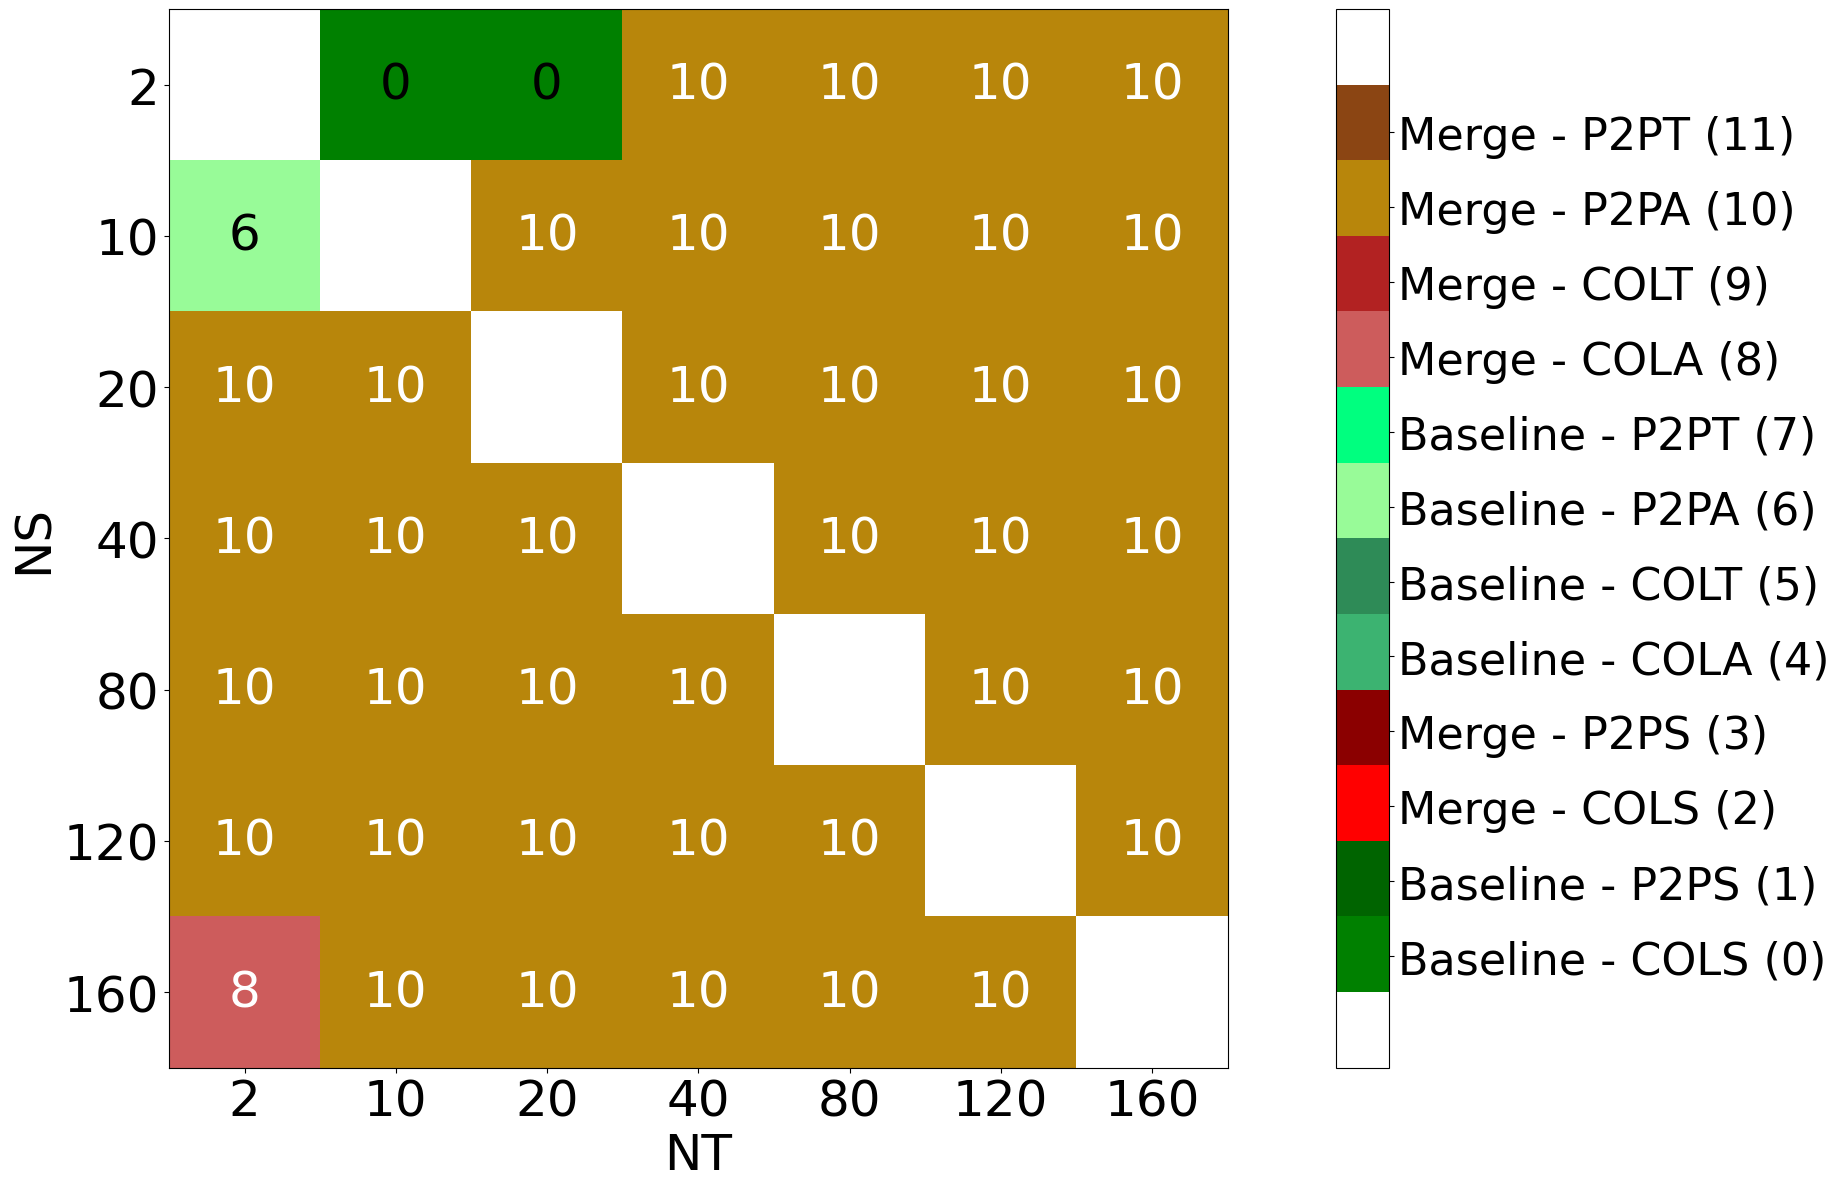

In [35]:
#Crea un heatmap teniendo en cuenta los colores anteriores
f=plt.figure(figsize=(24, 12))
ax=f.add_subplot(111)

myColors = (colors.to_rgba("white"), 
    colors.to_rgba("green"), #BCOLS
    colors.to_rgba("darkgreen"), #BP2PS
    #colors.to_rgba("blue"),  #BRMA1S
    #colors.to_rgba("royalblue"), #BRMA2S
    colors.to_rgba("red"), #MCOLS
    colors.to_rgba("darkred"),  #MP2PS
    #colors.to_rgba("mediumblue"),  #MRMA1S
    #colors.to_rgba("mediumslateblue"), #MRMA2S
    #colors.to_rgba("blue"),  #BIntraCOLS
    #colors.to_rgba("royalblue"), #BIntraP2PS
    colors.to_rgba("mediumseagreen"), #BCOLA
    colors.to_rgba("seagreen"),  #BCOLT
    colors.to_rgba("palegreen"), #BP2PA
    colors.to_rgba("springgreen"), #BP2PT
    #colors.to_rgba("purple"),  #BRMA1A
    #colors.to_rgba("darkviolet"), #BRMA1T
    #colors.to_rgba("indigo"),  #BRMA2A
    #colors.to_rgba("rebeccapurple"), #BRMA2T
    colors.to_rgba("indianred"), #MCOLA 
    colors.to_rgba("firebrick"), #MCOLT
    colors.to_rgba("darkgoldenrod"), #MP2PA
    colors.to_rgba("saddlebrown"), #MP2PT
    #colors.to_rgba("magenta"),  #MRMA1A
    #colors.to_rgba("violet"), #MRMA1T
    #colors.to_rgba("deeppink"),  #MRMA2A
    #colors.to_rgba("mediumvioletred"), #MRMA2T
    #colors.to_rgba("mediumblue"),  #BIntraCOLA
    #colors.to_rgba("mediumslateblue"), #BIntraP2PA
    colors.to_rgba("white"))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

im = ax.imshow(heatmap,cmap=cmap,interpolation='nearest')

# Loop over data dimensions and create text annotations.
used_aux=0
results_str = get_heatmap_strings(heatmap)
for i in range(len(processes)):
    for j in range(len(processes)):
        if i!=j:
            aux_color="white"
            if 0 <= heatmap[i, j] <= 1 or 4 <= heatmap[i, j] <= 7: # El 1 puede necesitar texto en negro
                aux_color="black"
            results_index = i*len(processes) +j-used_aux
            if len(results_str[results_index]) == 1:
                text = results_str[results_index][0]
                ax.text(j, i, text, ha="center", va="center", color=aux_color, fontsize=36)
            else:
                add_aux = 0.33
                for line in range(len(results_str[results_index])):
                    i_range = i - 0.5 + add_aux
                    ax.text(j, i_range, results_str[results_index][line],
                            ha="center", va="center", color=aux_color, fontsize=36)
                    add_aux+=0.33
        else:
            used_aux+=1

ax.set_ylabel("NS", fontsize=36)
ax.set_xlabel("NT", fontsize=36)

ax.set_xticklabels(['']+processes, fontsize=36)
ax.set_yticklabels(['']+processes, fontsize=36)


labelsMethods_aux = ['Baseline - COLS (0)', 'Baseline - P2PS (1)',
                    'Merge - COLS (2)','Merge - P2PS (3)',
                    'Baseline - COLA (4)', 'Baseline - COLT (5)','Baseline - P2PA (6)','Baseline - P2PT (7)',
                    'Merge - COLA (8)','Merge - COLT (9)','Merge - P2PA (10)','Merge - P2PT (11)']

#labelsMethods_aux = ['Baseline - COLS (0)', 'Baseline - P2PS (1)',
#                    'Baseline - RMA1S (2)', 'Baseline - RMA2S (3)',
#                    'Merge - COLS (4)','Merge - P2PS (5)',
#                    'Merge - RMA1S (6)', 'Merge - RMA2S (7)',
#                    'Baseline - COLA (8)', 'Baseline - COLT (9)','Baseline - P2PA (10)','Baseline - P2PT (11)',
#                    'Baseline - RMA1A (12)', 'Baseline - RMA1T (13)','Baseline - RMA2A (14)','Baseline - RMA2T (15)',
#                    'Merge - COLA (16)','Merge - COLT (17)','Merge - P2PA (18)','Merge - P2PT (19)',
#                    'Merge - RMA1A (20)','Merge - RMA1T (21)','Merge - RMA2A (22)','Merge - RMA2T (23)']

colorbar=f.colorbar(im, ax=ax)
tick_bar = []
for i in range(len(used_config)):
    #tick_bar.append(0.41 + i*0.96) #Config de 24 valores
    tick_bar.append(0.37 + i*0.92) #Config de 12 valores
    #tick_bar.append(0.35 + i*0.89) #Config de 8 valores
colorbar.set_ticks(tick_bar) 
colorbar.set_ticklabels(labelsMethods_aux)
colorbar.ax.tick_params(labelsize=32)
#

f.tight_layout()
print("Filename: Heatmap_"+tipo+".png")
f.savefig("Images/Heatmap_"+tipo+".jpeg", format="jpeg", dpi=300)

In [18]:
aux_array = [] #Counts all
for data in results:
    aux_array+=data
aux_results, aux_counts = np.unique(aux_array, return_counts=True)
print(aux_results)
print(aux_counts)

aux_array = [0] * len(results) # Counts ganador celda
for index in range(len(results)):
    aux_array[index] = results[index][0]
aux_results, aux_counts = np.unique(aux_array, return_counts = True)
print(aux_results)
print(aux_counts)


[ 0  1  2  3  4  5  6  7  8  9 10 11]
[25 18 33 29 10 12 14  8 35 33 38 25]
[ 0  1  2  3  6  7  8  9 10 11]
[ 8  2  7  2  2  1  6  2 10  2]


In [105]:
def normalize_arrays(arrays, norm_array):
    new_arrays = arrays.copy()
    for index in range(len(new_arrays)):
        new_arrays[index] = np.divide(norm_array, new_arrays[index])
    return new_arrays

def create_labels_lineplot(used_direction, user_condition=lambda a, b: True):
    labels_aux = []
    if used_direction == 's':
        for ns_aux in processes:
            for np_aux in processes:
                if used_direction=='s' and np_aux > ns_aux and np_aux != ns_aux and user_condition(np_aux, ns_aux):
                    new_label = "(" + str(np_aux) + "," + str(ns_aux) + ")"
                    labels_aux.append(new_label)
    else:
        for np_aux in processes:
            for ns_aux in processes:
                if ((used_direction=='e' and np_aux < ns_aux) or used_direction=='a') and np_aux != ns_aux and user_condition(np_aux, ns_aux):
                    new_label = "(" + str(np_aux) + "," + str(ns_aux) + ")"
                    labels_aux.append(new_label)
    return labels_aux

def reorder_data(plot_data, actual_order, expected_order):
    ordered_indexes = []
    len_order = len(actual_order)
    for index in range(len_order):
        actual_order[index] = str(actual_order[index]).replace(" ", "")
    for index in range(len_order):
        ordered_indexes.append(actual_order.index(expected_order[index]))

    for index in range(len(plot_data)):
        old_array = plot_data[index]
        new_array = []
        for i in ordered_indexes:
            new_array.append(old_array[i])
        plot_data[index] = new_array

    return plot_data

In [251]:
dfG

Total_Resizes  Total_Groups    SDR   ADR          DR  \
0               1             2  100.0   0.0  3550186388   
1               1             2  100.0   0.0  3550186388   
2               1             2  100.0   0.0  3550186388   
3               1             2  100.0   0.0  3550186388   
4               1             2  100.0   0.0  3550186388   
..            ...           ...    ...   ...         ...   
95              1             2    0.2  99.8  3550186388   
96              1             2    0.2  99.8  3550186388   
97              1             2    0.2  99.8  3550186388   
98              1             2    0.2  99.8  3550186388   
99              1             2    0.2  99.8  3550186388   

   Redistribution_Method Redistribution_Strategy Spawn_Method Spawn_Strategy  \
0                 (0, 0)                  (0, 0)       (0, 1)         (0, 0)   
1                 (0, 0)                  (0, 0)       (0, 1)         (0, 0)   
2                 (0, 0)                  (0, 0)       (0, 1)         (0, 0)   
3                 (0, 0)                  (0, 0)       (0, 1)         (0, 0)   
4                 (0, 0)                  (0, 0)       (0, 1)         (0, 0)   
..                   ...                     ...          ...            ...   
95                (0, 0)                  (0, 0)       (0, 1)         (0, 0)   
96                (0, 0)                  (0, 0)       (0, 1)         (0, 0)   
97                (0, 0)                  (0, 0)       (0, 1)         (0, 0)   
98                (0, 0)                  (0, 0)       (0, 1)         (0, 0)   
99                (0, 0)                  (0, 0)       (0, 1)         (0, 0)   

       Groups       Iters      T_spawn         T_SR         T_AR  \
0   (160, 20)  (500, 500)   (0.00179,)  (0.303186,)         (0,)   
1   (160, 20)  (500, 500)  (0.002427,)  (0.169282,)         (0,)   
2   (160, 20)  (500, 500)    (0.0018,)  (0.333988,)         (0,)   
3   (160, 20)  (500, 500)  (0.001542,)  (0.119925,)         (0,)   
4   (160, 20)  (500, 500)  (0.001487,)  (0.162517,)         (0,)   
..        ...         ...          ...          ...          ...   
95  (160, 40)  (500, 500)  (0.001867,)  (0.012053,)  (0.198771,)   
96  (160, 40)  (500, 500)  (0.001594,)  (0.011036,)  (0.170305,)   
97  (160, 40)  (500, 500)  (0.001827,)   (0.01112,)  (0.169132,)   
98  (160, 40)  (500, 500)  (0.001688,)  (0.011422,)  (0.487583,)   
99  (160, 40)  (500, 500)  (0.001775,)    (0.0146,)  (0.185643,)   

   T_Malleability     T_total  
0      (0.90641,)  170.946754  
1     (0.970759,)  176.884340  
2     (1.006021,)  172.216504  
3     (0.879846,)  182.188719  
4     (0.781511,)  257.321413  
..            ...         ...  
95    (0.851172,)  157.064828  
96    (0.771764,)  162.476163  
97    (0.802863,)  164.167608  
98    (1.068855,)  167.163320  
99     (0.89982,)  229.011648  

[200 rows x 16 columns]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


['(2,20)', '(2,40)', '(2,80)', '(2,160)', '(20,40)', '(20,80)', '(20,160)', '(40,80)', '(40,160)', '(80,160)']
[0.031203, 0.034094, 0.036393, 0.036872, 0.325629, 0.161447, 0.051848, 0.275889, 0.117939, 0.124082]
[0.016136, 0.018315, 0.017299, 0.020972, 0.00817, 0.008836, 0.010475, 0.006352, 0.006724, 0.001864]


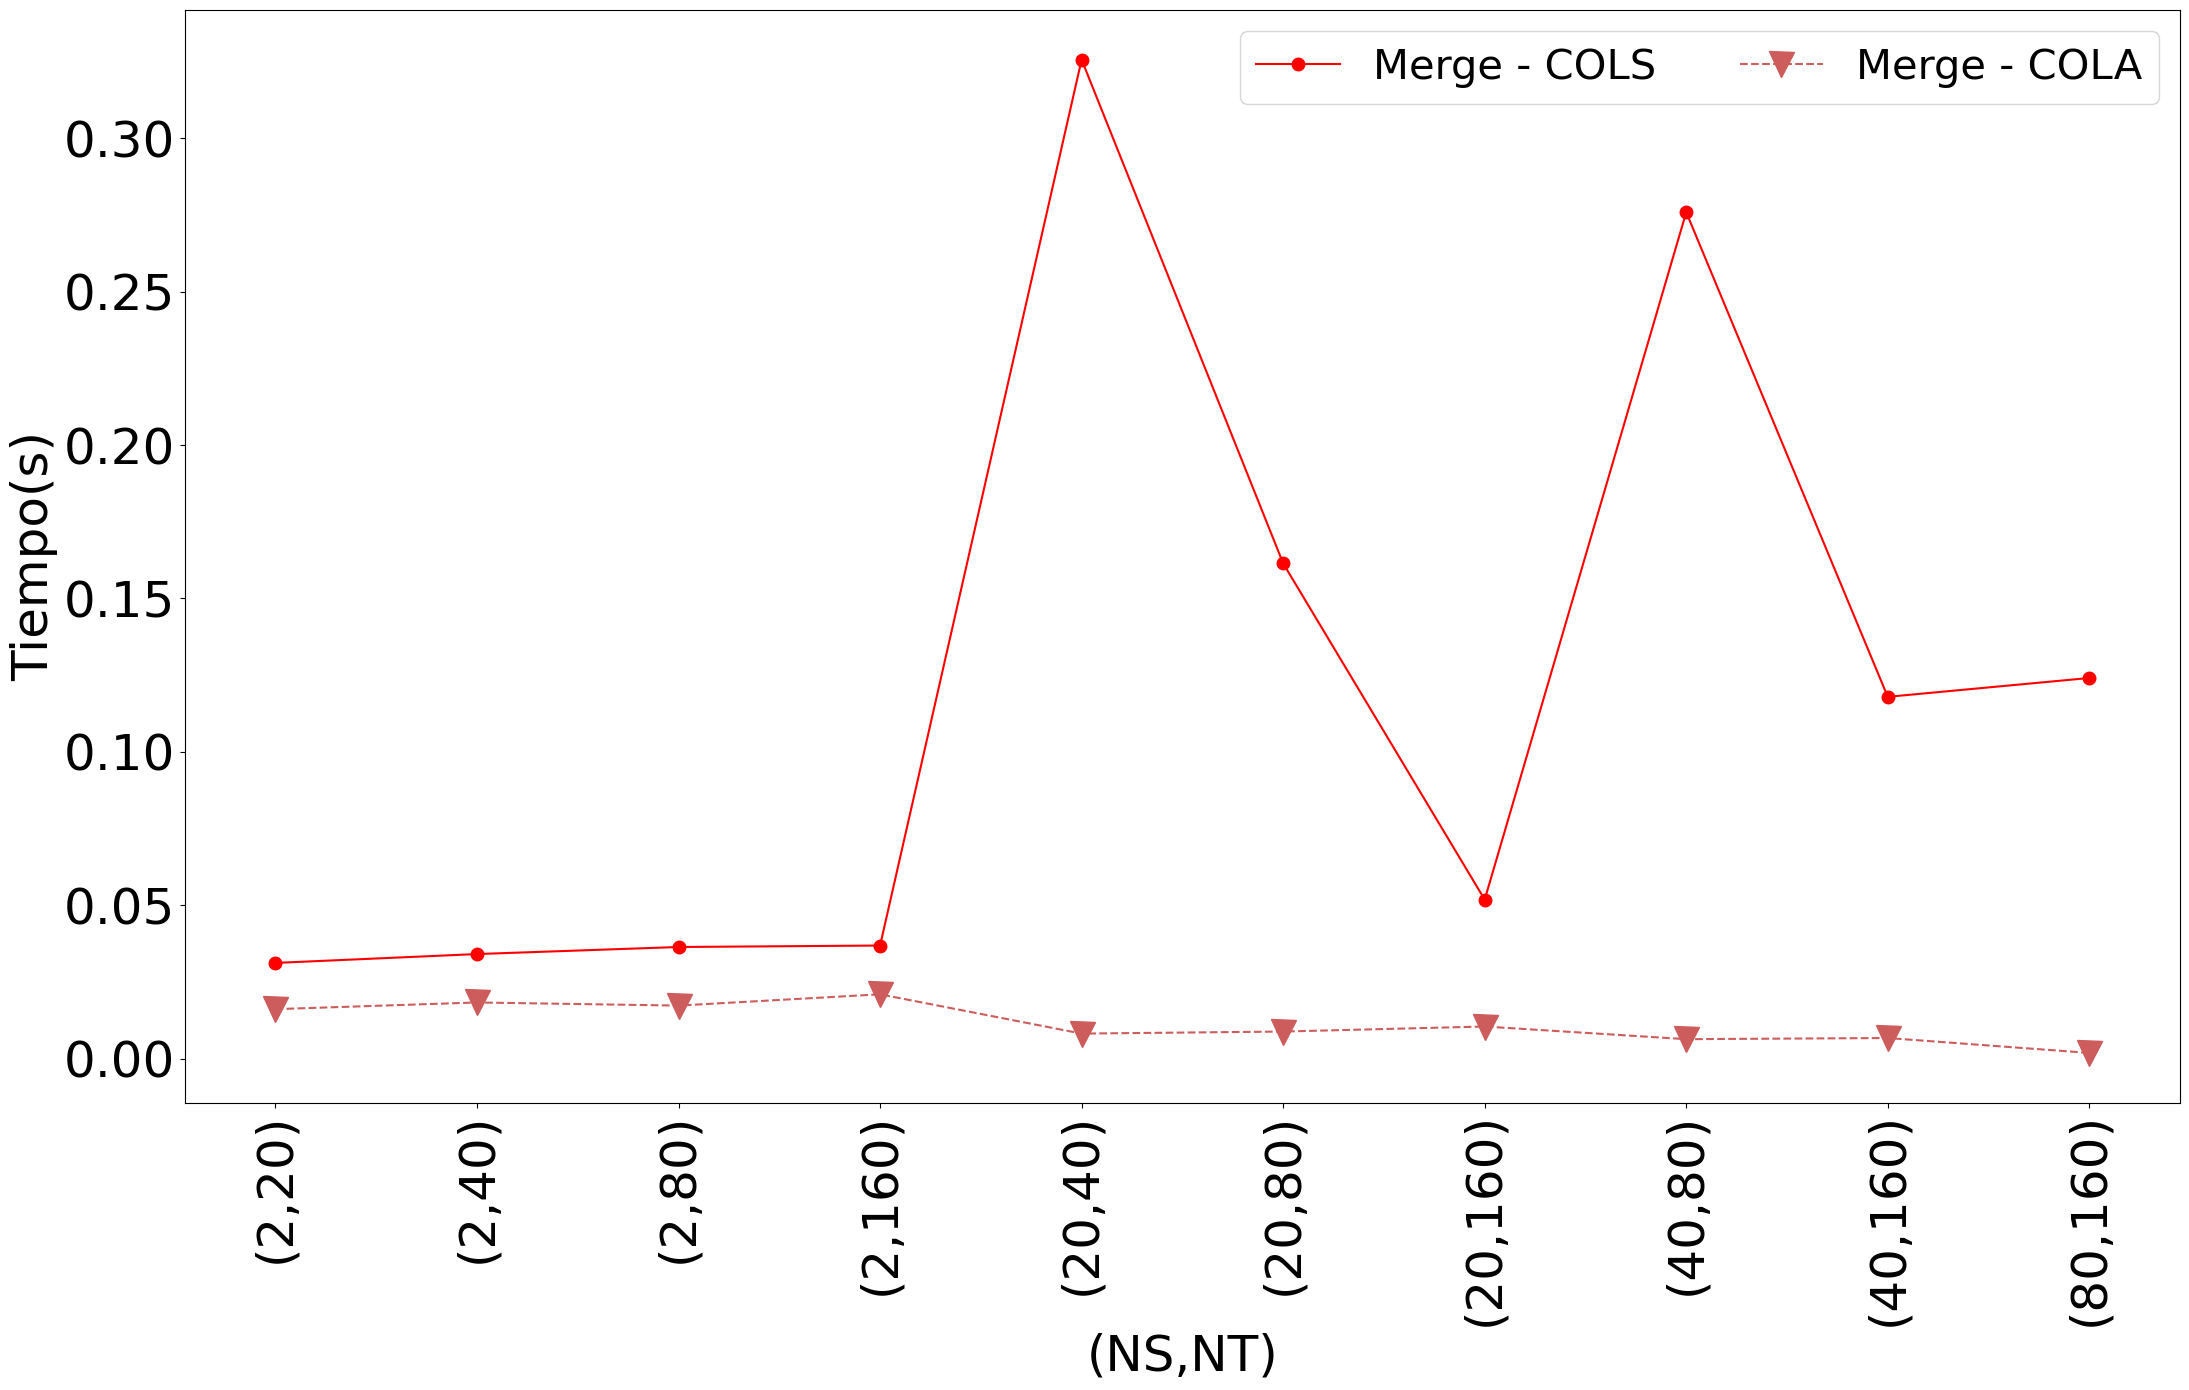

In [256]:
used_direction='e'
test_parameter='T_SR'

if test_parameter == 'alpha':
    name_fig="Alpha_"
    real_parameter='Alpha'
    name_legend = "Values of α"
    normalize = True
    allow_all = False
    used_config = configurations_simple
    data_aux = grouped_aggM[grouped_aggM[real_parameter] > 0]
elif test_parameter == 'T_Malleability':
    name_fig="Malleability_"
    real_parameter='T_Malleability'
    name_legend = "Time(s)"
    normalize = False
    allow_all = True
    used_config = configurations_simple
    data_aux = grouped_aggM
elif test_parameter == 'T_Redistribution':
    name_fig="Redistribution_"
    real_parameter='T_Redistribution'
    name_legend = "Tiempo(s)"
    normalize = False
    allow_all = True
    used_config = configurations_simple
    data_aux = grouped_aggM
elif test_parameter == 'T_spawn':
    name_fig="Spawn_"
    real_parameter='T_spawn'
    name_legend = "Tiempo(s)"
    normalize = False
    allow_all = True
    used_config = configurations_simple
    data_aux = grouped_aggM
elif test_parameter == 'T_SR':
    name_fig="SR_"
    real_parameter='T_SR'
    name_legend = "Tiempo(s)"
    normalize = False
    allow_all = True
    used_config = configurations_simple
    data_aux = grouped_aggM
    
if used_direction=='s':
    data_aux=data_aux.query('NP > NC')
    name_fig= name_fig+"Shrink"
elif used_direction=='e':
    data_aux=data_aux.query('NP < NC')
    name_fig= name_fig+"Expand"
elif used_direction=='a':
    name_fig= name_fig+"All"   
#data_aux=data_aux.query('NP == 160 or NC == 160')

plot_data = []
for config in used_config:
    if config[0] > 0 or allow_all:
        dataLists,procsLists = get_config_data(real_parameter, data_aux, config)
        dataLists = list(filter(lambda x: x != float('infinity'), dataLists))
        plot_data.append(dataLists)
    
#labels_aux = create_labels_lineplot(used_direction, lambda a, b: a == 160 or b == 160)
labels_aux = create_labels_lineplot(used_direction)
plot_data = reorder_data(plot_data, procsLists, labels_aux)

labelsMethods_aux = ['Merge - COLS',
                    'Merge - COLA',]
colors_m = ( 
    #colors.to_rgba("green"), #BCOLS
    #colors.to_rgba("darkgreen"), #BP2PS
    #colors.to_rgba("blue"),  #BRMA1S
    #colors.to_rgba("royalblue"), #BRMA2S
    colors.to_rgba("red"), #MCOLS
    #colors.to_rgba("darkred"),  #MP2PS
    #colors.to_rgba("mediumblue"),  #MRMA1S
    #colors.to_rgba("mediumslateblue"), #MRMA2S
    #colors.to_rgba("blue"),  #BIntraCOLS
    #colors.to_rgba("royalblue"), #BIntraP2PS
    #colors.to_rgba("mediumseagreen"), #BCOLA
    #colors.to_rgba("seagreen"),  #BCOLT
    #colors.to_rgba("palegreen"), #BP2PA
    #colors.to_rgba("springgreen"), #BP2PT
    #colors.to_rgba("purple"),  #BRMA1A
    #colors.to_rgba("darkviolet"), #BRMA1T
    #colors.to_rgba("indigo"),  #BRMA2A
    #colors.to_rgba("rebeccapurple"), #BRMA2T
    colors.to_rgba("indianred"), #MCOLA 
    #colors.to_rgba("firebrick"), #MCOLT
    #colors.to_rgba("darkgoldenrod"), #MP2PA
    #colors.to_rgba("saddlebrown"), #MP2PT
    #colors.to_rgba("magenta"),  #MRMA1A
    #colors.to_rgba("violet"), #MRMA1T
    #colors.to_rgba("deeppink"),  #MRMA2A
    #colors.to_rgba("mediumvioletred"), #MRMA2T
    #colors.to_rgba("mediumblue"),  #BIntraCOLA
    #colors.to_rgba("mediumslateblue"), #BIntraP2PA
    )

f=plt.figure(figsize=(22, 14))
ax=f.add_subplot(111)
print(labels_aux)
x = np.arange(len(labels_aux))
for index in range(len(plot_data)):
    array_aux = plot_data[index]
    plot_index = index
    print(array_aux)
    ax.plot(x, array_aux, color=colors_m[plot_index%len(colors_m)], linestyle=linestyle_m[plot_index%len(linestyle_m)], \
        marker=markers_m[plot_index%len(markers_m)], markersize=18, label=labelsMethods_aux[plot_index])

ax.set_xlabel("(NS,NT)", fontsize=36)
ax.set_ylabel(name_legend, fontsize=36)
if normalize:
    ax.axhline(y=1, color='black', linestyle='--')
plt.xticks(x, labels_aux,rotation=90)
ax.tick_params(axis='both', which='major', labelsize=36)
ax.tick_params(axis='both', which='minor', labelsize=36)
plt.legend(loc='best', fontsize=30,ncol=2,framealpha=0.8)
    
#plt.ylim([0,8])
f.tight_layout()
f.savefig("Images/LinePlot_"+name_fig+".eps", format="eps", dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[814.67876291, 808.5604651, 795.9308548, 795.54596305, 190.34062719, 177.72450495, 176.88434005, 163.42062998, 161.76110101, 147.07955885]
[816.94620895, 807.90405488, 792.34561992, 789.45519304, 183.67259693, 176.26401806, 173.38925004, 159.47613788, 164.16760778, 146.63839984]


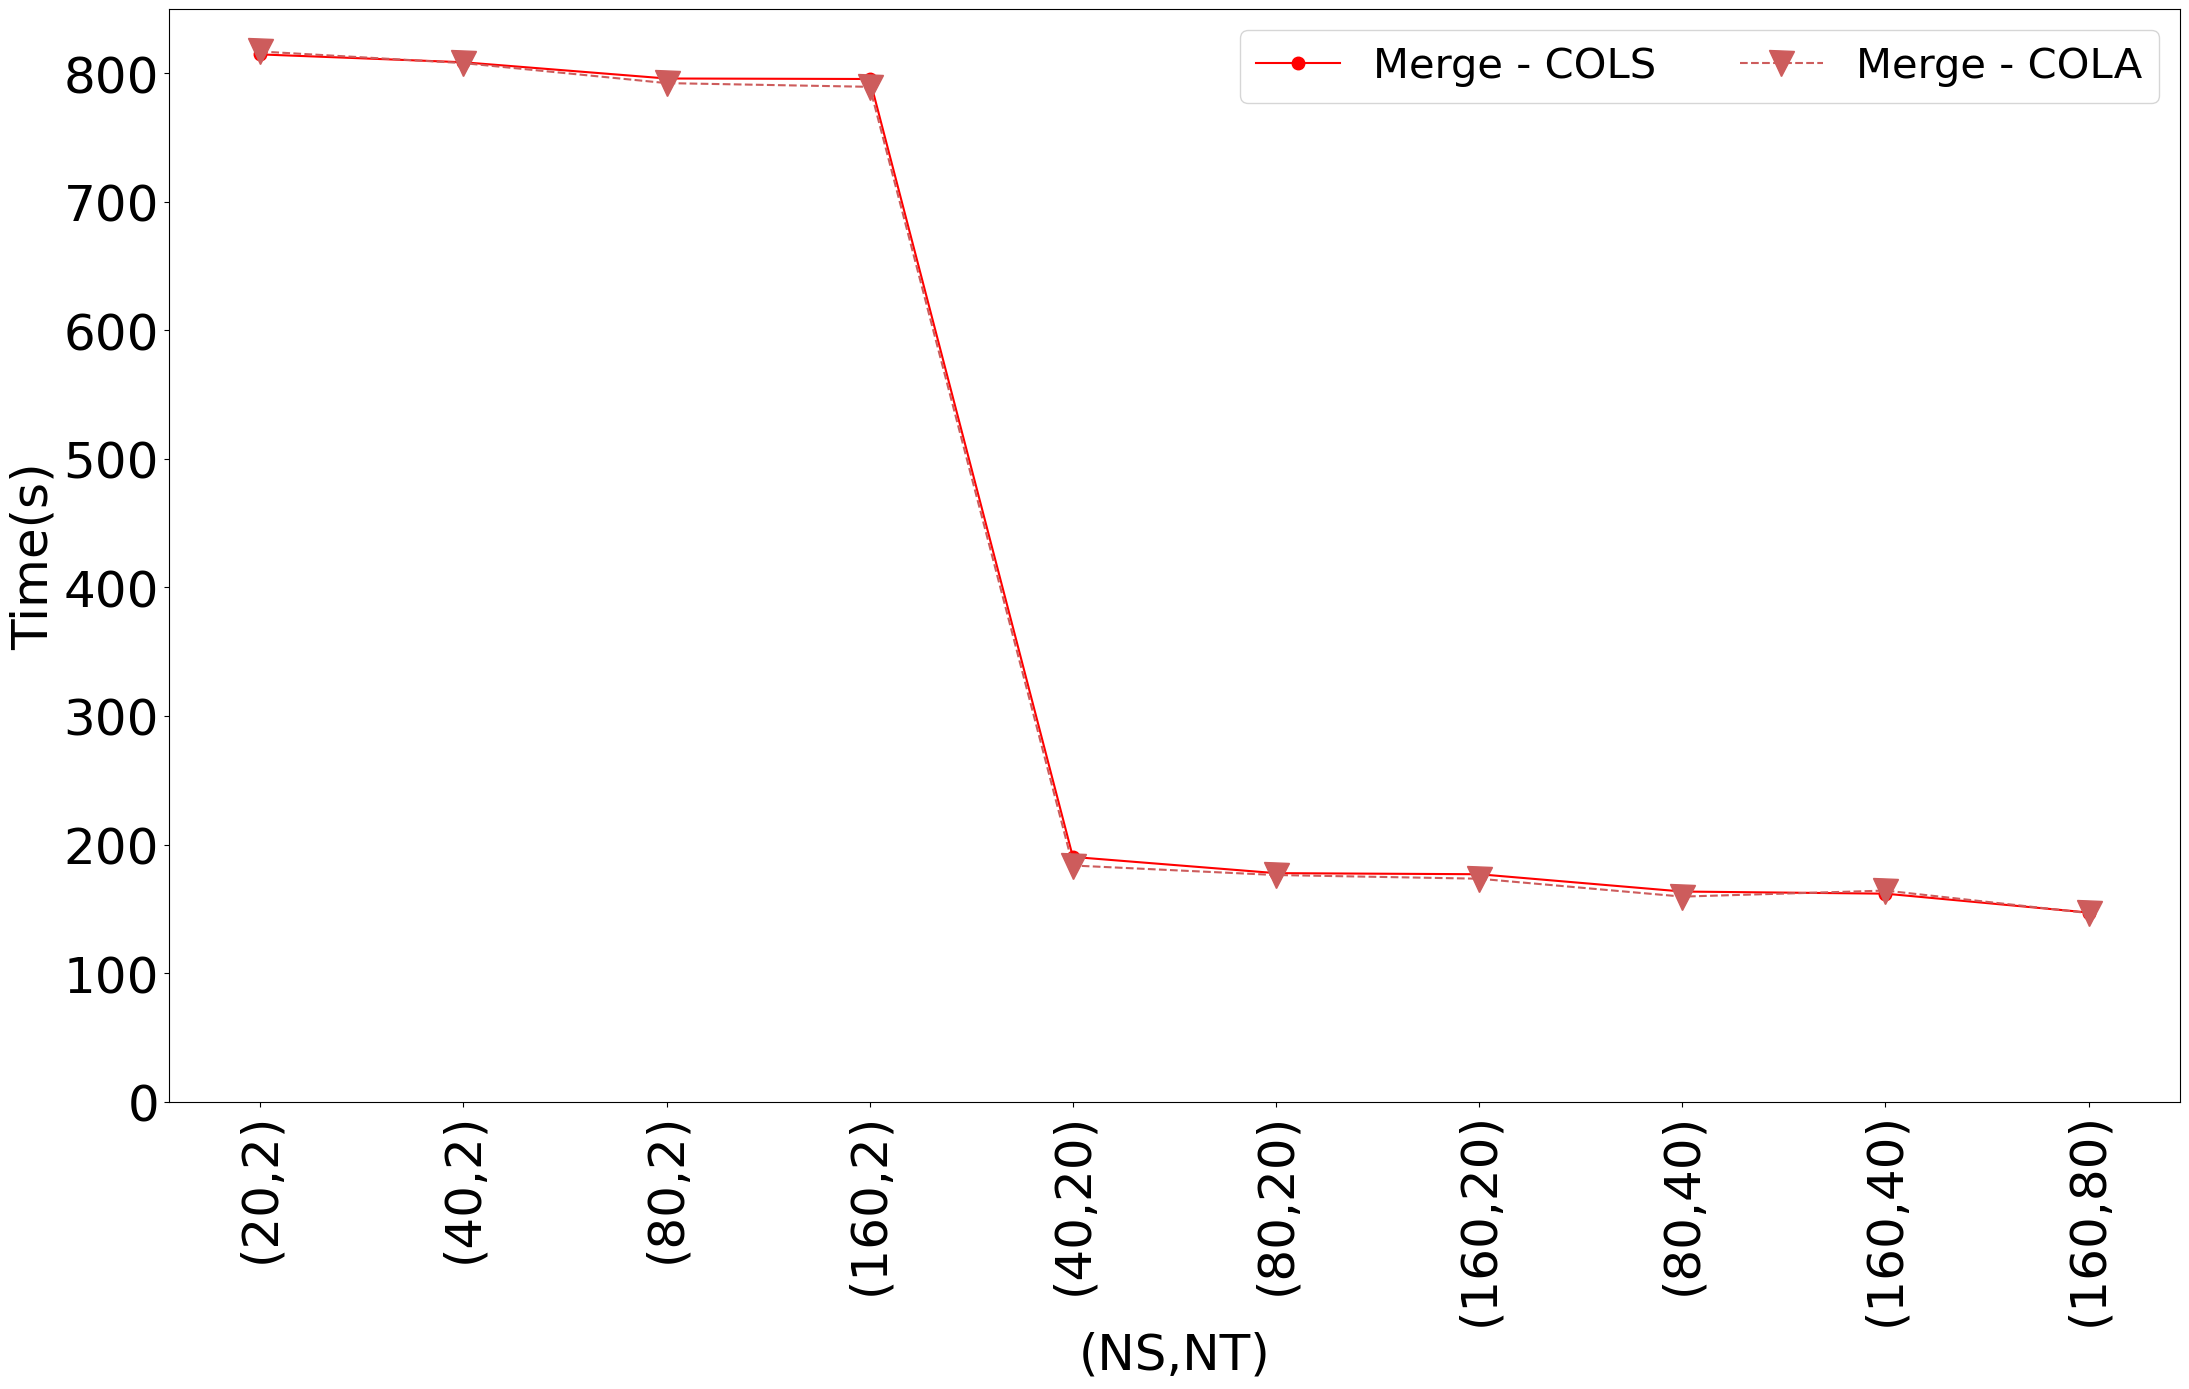

In [247]:
used_direction='s'
test_parameter='T_total' #Valores son "alpha" o "omega"
intranode=False

if test_parameter == 'T_total':
    name_fig="Ttotal"
    real_parameter='T_total'
    name_legend = "Time(s)"
    used_config = configurations
    data_aux = grouped_aggG
    #data_aux = data_aux[data_aux.index.isin(df1.index)]
    
if used_direction=='s':
    data_aux_cmp=grouped_aggM.reset_index().query('NP > NC')
    name_fig= name_fig+"Shrink"
elif used_direction=='e':
    data_aux_cmp=grouped_aggM.reset_index().query('NP < NC')
    name_fig= name_fig+"Expand"
elif used_direction=='a':
    data_aux_cmp=grouped_aggM.reset_index()
    name_fig= name_fig+"All"
    
if intranode:
    data_aux_cmp = data_aux_cmp.query('NP <= 20 and NC <= 20')
#else:
    #data_aux_cmp = data_aux_cmp.query('NP > 20 and NC > 20')
#data_aux_cmp = data_aux_cmp.query('NP == 160 or NC == 160')

if used_direction!='a' or True:
    pruebaG = data_aux.reset_index()
    pruebaG = pruebaG.loc[pruebaG.index.intersection(data_aux_cmp.index)]
    data_aux = data_aux[(data_aux.T_total.isin(pruebaG.T_total))]

plot_data = []
for config in used_config:
    #if config[0] == 0:
    dataLists,procsLists = get_config_data(real_parameter, data_aux, config)
    dataLists = list(filter(lambda x: x != float('infinity'), dataLists))
    plot_data.append(dataLists)

    
    
#labels_aux = create_labels_lineplot(used_direction, lambda a, b: a == 160 or b == 160)
labels_aux = create_labels_lineplot(used_direction)
plot_data = reorder_data(plot_data, procsLists, labels_aux)
#plot_data_normalized = normalize_arrays(plot_data[1:], plot_data[0])
#name_legend="SpeedUp over Baseline COLS"

for array_aux in plot_data:
    print(array_aux)
labelsMethods_aux = ['Merge - COLS',
                    'Merge - COLA',]
colors_m = ( 
    #colors.to_rgba("green"), #BCOLS
    #colors.to_rgba("darkgreen"), #BP2PS
    #colors.to_rgba("blue"),  #BRMA1S
    #colors.to_rgba("royalblue"), #BRMA2S
    colors.to_rgba("red"), #MCOLS
    #colors.to_rgba("darkred"),  #MP2PS
    #colors.to_rgba("mediumblue"),  #MRMA1S
    #colors.to_rgba("mediumslateblue"), #MRMA2S
    #colors.to_rgba("blue"),  #BIntraCOLS
    #colors.to_rgba("royalblue"), #BIntraP2PS
    #colors.to_rgba("mediumseagreen"), #BCOLA
    #colors.to_rgba("seagreen"),  #BCOLT
    #colors.to_rgba("palegreen"), #BP2PA
    #colors.to_rgba("springgreen"), #BP2PT
    #colors.to_rgba("purple"),  #BRMA1A
    #colors.to_rgba("darkviolet"), #BRMA1T
    #colors.to_rgba("indigo"),  #BRMA2A
    #colors.to_rgba("rebeccapurple"), #BRMA2T
    colors.to_rgba("indianred"), #MCOLA 
    #colors.to_rgba("firebrick"), #MCOLT
    #colors.to_rgba("darkgoldenrod"), #MP2PA
    #colors.to_rgba("saddlebrown"), #MP2PT
    #colors.to_rgba("magenta"),  #MRMA1A
    #colors.to_rgba("violet"), #MRMA1T
    #colors.to_rgba("deeppink"),  #MRMA2A
    #colors.to_rgba("mediumvioletred"), #MRMA2T
    #colors.to_rgba("mediumblue"),  #BIntraCOLA
    #colors.to_rgba("mediumslateblue"), #BIntraP2PA
    )


f=plt.figure(figsize=(22, 14))
ax=f.add_subplot(111)
#ax2 = ax.twinx()
x = np.arange(len(labels_aux))

for index in range(len(plot_data)):
#for index in range(len(plot_data_normalized)):
    #array_aux = plot_data_normalized[index]
    #index = index + 1
    array_aux = plot_data[index]
    ax.plot(x, array_aux, color=colors_m[index%len(colors_m)], linestyle=linestyle_m[index%len(linestyle_m)], \
        marker=markers_m[index%len(markers_m)], markersize=18, label=labelsMethods_aux[index])
#ax2.plot(x, plot_data[0], color='black', linestyle=linestyle_m[0], \
#        marker=markers_m[0], markersize=18, label=labelsMethods_aux[0])
#ax.axhline(y=1, color='black', linestyle='--')

ax.set_xlabel("(NS,NT)", fontsize=36)
ax.set_ylabel(name_legend, fontsize=36)
ax.tick_params(axis='both', which='both', labelsize=36)
ax.set_xticks(x)
ax.set_xticklabels(labels_aux, rotation=90)
ax.legend(loc='best', fontsize=30,ncol=2,framealpha=0.8)

#ax2.set_ylabel('Baseline Time(s)', fontsize=36)
#ax2.tick_params(axis='y', which='both', labelsize=36)
#ax2.legend(loc='best', fontsize=30,ncol=2,framealpha=0.8)

#f.legend(bbox_to_anchor=(0.5, 0.98), fontsize=26,ncol=2,framealpha=0.8)

plt.ylim([0,850])
f.tight_layout()
f.savefig("Images/LinePlot_"+name_fig+".eps", format="eps", dpi=300)

In [ ]:
def generate_3d_image(config, name):
    fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'}, figsize=(15, 15))

    Z = [None] * len(processes)
    X, Y = np.meshgrid(processes, processes)
    for i in range(len(processes)):
        np_aux = processes[i]
        Z[i] = [0] * len(processes)
        Z[i][i] = grouped_aggLSynch.loc[np_aux, 'T_iter'] * 1000
        for j in range(len(processes)):
            if i!=j:
                ns_aux = processes[j]
                config.append((np_aux,ns_aux))
                aux = grouped_aggG.loc[tuple(config),'T_total']
                config.pop()
            
                Z[i][j] = aux.values[0]
                #Z[i][j] = Z[i][j] / Z[i][i]
        #Z[i][i] = 1

    Z = np.array(Z)

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
    ax.view_init(15, 25)
    ax.set_xlabel("NC", fontsize=16)
    ax.set_ylabel("NP", fontsize=16)
    ax.set_zlabel("Normalized time", fontsize=16)
    ax.set_title(name, fontsize=10)
    plt.show()
    
for index in range(len(configurations)):
    used_config = configurations[index]
    generate_3d_image(used_config,str(index))

In [117]:
test=dfM[(dfM.Asynch_Iters > 0)]

# Seguro con barriers en Malleability
test["Resize_Coherency"] = test["T_Malleability"] >= (test["T_spawn"] + test["T_SR"] + test["T_AR"])
# Seguro al usar Rigid para iteraciones
test["Resize_Coherency2"] = test["T_Malleability"] >= 0

for index in range(len(test)):
    time_malleability_aux = test["T_Malleability"].values[index]
    time_synch_aux = test["T_SR"].values[index]
    time_spawn_aux = test["T_spawn"].values[index]
    is_asynch_spawn = (test["Spawn_Strategy"].values[index] % 2 == 0)
    
    total_asynch_iters = int(test["Asynch_Iters"].values[index])
    asynch_iters = test["T_iter"].values[index][-total_asynch_iters:]
    time_iters_aux = np.sum(asynch_iters[:])
    
    sum_times = time_synch_aux + is_asynch_spawn * time_spawn_aux + time_iters_aux
    
    if time_malleability_aux < sum_times:
        real_index = test.index.values[index]
        test.at[real_index, "Resize_Coherency2"] = False
test[(test.Resize_Coherency == False)].query('Redistribution_Method > 1')

/tmp/ipykernel_5572/389841414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Resize_Coherency"] = test["T_Malleability"] >= (test["T_spawn"] + test["T_SR"] + test["T_AR"])
/tmp/ipykernel_5572/389841414.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Resize_Coherency2"] = test["T_Malleability"] >= 0


NP   NC  Total_Stages  Granularity  SDR   ADR          DR  \
3365  160   40             4       100000  3.4  96.6  3947883503   
3369  160   40             4       100000  3.4  96.6  3947883503   
3377   10   80             4       100000  3.4  96.6  3947883503   
3378   10   80             4       100000  3.4  96.6  3947883503   
3379   10   80             4       100000  3.4  96.6  3947883503   
...   ...  ...           ...          ...  ...   ...         ...   
4942   80  120             4       100000  3.4  96.6  3947883503   
4946   10  160             4       100000  3.4  96.6  3947883503   
5015   20   40             4       100000  3.4  96.6  3947883503   
5019   20   40             4       100000  3.4  96.6  3947883503   
5024   80  160             4       100000  3.4  96.6  3947883503   

      Redistribution_Method  Redistribution_Strategy  Spawn_Method  ...  \
3365                      3                        1             0  ...   
3369                      3                        1             0  ...   
3377                      2                        1             0  ...   
3378                      2                        1             0  ...   
3379                      2                        1             0  ...   
...                     ...                      ...           ...  ...   
4942                      2                        1             0  ...   
4946                      2                        1             0  ...   
5015                      3                        1             0  ...   
5019                      3                        1             0  ...   
5024                      3                        1             0  ...   

                                                 T_iter  \
3365  (0.080089, 0.068342, 0.07505, 0.072798, 0.0699...   
3369  (0.086699, 0.066044, 0.075696, 0.06642, 0.0639...   
3377  (0.161248, 0.144384, 0.144557, 0.14431, 0.1442...   
3378  (0.161471, 0.14405, 0.14408, 0.144116, 0.14397...   
3379  (0.159191, 0.142719, 0.142697, 0.142688, 0.142...   
...                                                 ...   
4942  (0.084336, 0.068905, 0.069441, 0.069713, 0.068...   
4946  (0.158281, 0.141393, 0.14133, 0.141432, 0.1413...   
5015  (0.11029, 0.096805, 0.096761, 0.09668, 0.09663...   
5019  (0.112086, 0.100412, 0.100434, 0.100389, 0.100...   
5024  (0.075681, 0.067709, 0.077475, 0.072077, 0.061...   

                                               T_stages   T_spawn  \
3365  ((0.010719, 0.000228, 0.000233, 0.066149), (0....  1.361993   
3369  ((0.010715, 0.000236, 0.000177, 0.075494), (0....  1.386556   
3377  ((0.12486, 2.3e-05, 4e-06, 0.036361), (0.12485...  1.305879   
3378  ((0.124837, 5.1e-05, 4e-06, 0.036579), (0.1248...  1.258065   
3379  ((0.12483, 6.2e-05, 5e-06, 0.034293), (0.12483...  1.281582   
...                                                 ...       ...   
4942  ((0.01874, 0.000139, 0.000249, 0.065207), (0.0...  1.562654   
4946  ((0.124845, 7.9e-05, 6e-06, 0.033346), (0.1248...  1.207222   
5015  ((0.071351, 4.6e-05, 4e-06, 0.038875), (0.0713...  1.572005   
5019  ((0.071344, 6e-05, 5e-06, 0.040672), (0.071354...  1.422274   
5024  ((0.018734, 0.000245, 0.000277, 0.056425), (0....  1.461519   

     T_spawn_real      T_SR       T_AR  T_Malleability  T_Redistribution  \
3365          0.0  0.655943   6.733354        8.737903          7.389297   
3369          0.0  0.571906   6.351965        8.302590          6.923871   
3377          0.0  0.335867   6.975850        8.601865          7.311717   
3378          0.0  0.387988   7.279656        8.921822          7.667644   
3379          0.0  0.324005   4.475577        6.053441          4.799582   
...           ...       ...        ...             ...               ...   
4942          0.0  0.566601   9.522060       11.642518         10.088661   
4946          0.0  0.331889   4.651429        6.166739          4.983318   
5015          0.0  0.383955   8.767849       10.691947          9.1

In [ ]:
import dask.dataframe as dd
ddf = dd.from_pandas(dfL[(dfL.Asynch_Iters == False)], npartitions=10)
group = ddf.groupby('NP')['T_iter']
grouped_aggLSynch = group.agg(['mean'])
grouped_aggLSynch = grouped_aggLSynch.rename(columns={'mean':'T_iter'}) 
grouped_aggLSynch = grouped_aggLSynch.compute()

In [57]:
def test_ecdf(data1, data2):
    diff_aux = data1[0] - data2[0]
    cmp_f = (lambda a, b: a-b < 0) # Se esperan siempre diferencias positivas, si una es negativa se cruzan los ecdf's
    if diff_aux < 0:
        cmp_f = (lambda a, b: a-b > 0) # Se esperan siempre diferencias negativas, si una es positivas se cruzan los ecdf's
        
    for index_value in range(1,len(data1)):
        if cmp_f(data1[index_value], data2[index_value]):
            return False
    return True

def plot_ecdf(data1, data2, ecdf1, ecdf2, title):
    f=plt.figure(figsize=(22, 14))
    ax=f.add_subplot(111)

    ax.plot(data1, ecdf1, color=colors_m[0], linestyle=linestyle_m[0], \
        marker=markers_m[0], markersize=18)
    ax.plot(data2, ecdf2, color=colors_m[2], linestyle=linestyle_m[2], \
        marker=markers_m[2], markersize=18)

    ax.set_xlabel("Values", fontsize=36)
    ax.set_ylabel("Bins", fontsize=36)
    ax.tick_params(axis='both', which='major', labelsize=36)
    ax.tick_params(axis='both', which='minor', labelsize=36)
    ax.set_title(title, fontsize=40)
        
    f.tight_layout()

def check_specific_ecdf(np_aux, ns_aux, configuration_index):
    df_check = dfM
    tipo = 'T_Redistribution'
    used_config = configurations_simple
    dataLists = get_df_np_ns_data(df_check, tipo, used_config, np_aux, ns_aux)
    ecdfLists = []
    for index_i in range(len(dataLists)):
        dataLists[index_i].sort()
        ecdfLists.append( np.arange(1, len(dataLists[index_i])+1)/float(len(dataLists[index_i])) )

    index_i = configuration_index
    data_i = dataLists[index_i]
    ecdf_i = ecdfLists[index_i]
    for index_j in range(len(dataLists)):
        if index_i != index_j:
            data_j = dataLists[index_j]
            ecdf_j = ecdfLists[index_j]
            res_aux = test_ecdf(data_i, data_j)
            if not res_aux:
                aux_title = "NP="+str(np_aux)+"/NC="+str(ns_aux)+" -- Comparing C"+str(index_i) + " vs C"+str(index_j)
                plot_ecdf(data_i, data_j, ecdf_i, ecdf_j, aux_title)

In [ ]:
for np_aux in processes:
    for ns_aux in processes:
        if np_aux != ns_aux and not (np_aux==2 and ns_aux==20):
            check_winner_ecdf(np_aux, ns_aux, 9)

        
        

In [119]:
a = 5
b = 3
c = False
d = a + b * c
print(d)

5


In [2]:
#Ethernet
b1_aux = [82.747868, 83.191989, 95.520019, 87.435987, 90.843995, 150.356100]
b2_aux = [75.238174, 74.380054, 74.755995, 42.656109, 21.588040, 17.843997]
m1_aux = [74.654167, 74.357901, 74.351350, 43.599915, 21.637509, 15.128712]
m2_aux = [74.353249, 74.359214, 74.356160, 43.874266, 21.511082, 14.969010]

b3_aux = [105.128014, 110.004008, 126.552019, 116.312400, 95.752019, 151.023994]
b4_aux = [83.021885, 77.632630, 75.396010, 43.076039, 24.028075, 19.556047]
m3_aux = [118.275992, 83.027866, 81.008479, 46.432212, 24.247949, 17.725083]
m4_aux = [119.286457, 84.205993, 80.741585, 47.144632, 24.206617, 17.738496]

In [3]:
#Infiniband
b1_aux = [64.669525, 35.171971, 38.916010, 47.456630, 56.288048, 119.428020]
b2_aux = [36.538361, 15.536046, 13.396083, 9.652013, 5.772058, 5.615009]
m1_aux = [61.664380, 18.400559, 19.112526, 22.155880, 11.712381, 30.775627]
m2_aux = [33.428639, 13.905561, 14.691367, 7.363081, 6.629037, 12.150872]

b3_aux = [91.368664, 60.648074, 53.663981, 49.152031, 64.752057, 118.243807]
b4_aux = [84.941260, 34.039990, 26.008021, 12.298989, 7.916004, 5.736054]
m3_aux = [105.839726, 26.822071, 23.834452, 12.876862, 9.063136, 7.007535]
m4_aux = [75.412319, 25.566336, 22.129483, 12.491161, 7.903744, 6.534291]

[64.669525, 35.171971, 38.91601, 47.45663, 56.288048, 119.42802]
[61.66438, 18.400559, 19.112526, 22.15588, 11.712381, 30.775627]
[36.538361, 15.536046, 13.396083, 9.652013, 5.772058, 5.615009]
[33.428639, 13.905561, 14.691367, 7.363081, 6.629037, 12.150872]


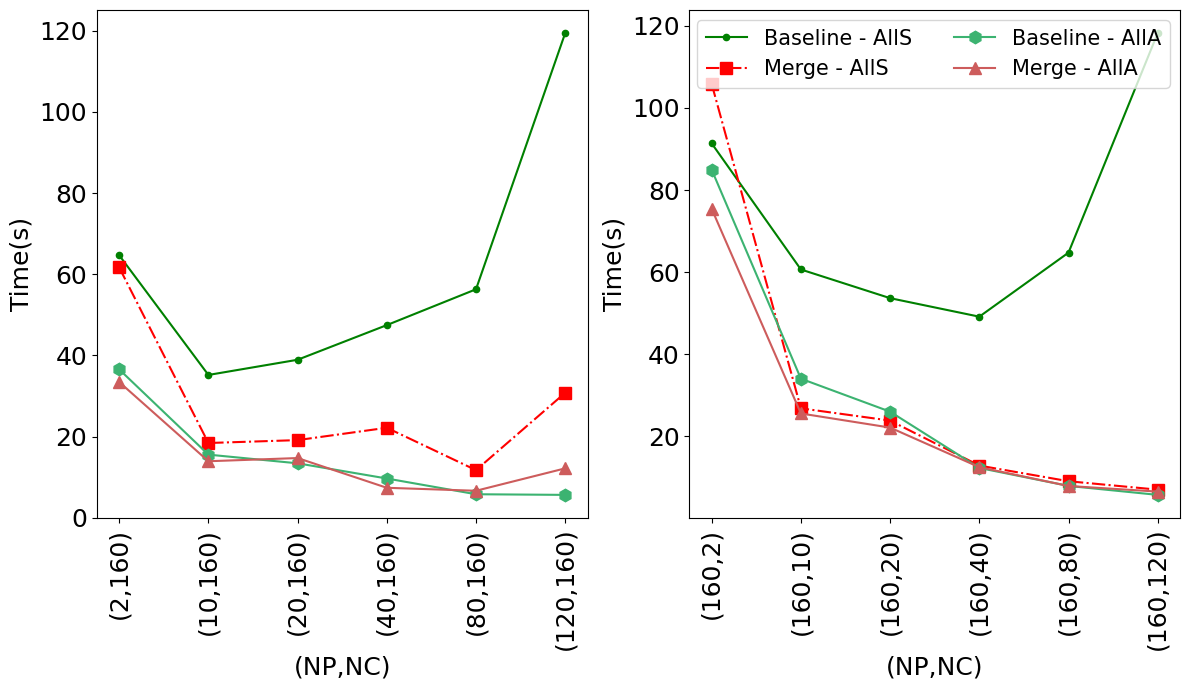

In [9]:


plot_data_e = [b1_aux, m1_aux, b2_aux, m2_aux] #Expand
plot_data_s = [b3_aux, m3_aux, b4_aux, m4_aux] #Shrink

labels_aux_e = create_labels_lineplot('e', lambda a, b: a == 160 or b == 160)
labels_aux_s = create_labels_lineplot('s', lambda a, b: a == 160 or b == 160)
#labels_aux = create_labels_lineplot(used_direction)

labelsMethods_aux = ['Baseline - AllS', 'Merge - AllS',
                     'Baseline - AllA','Merge - AllA']

#labelsMethods_aux = ['Baseline - All', 'Baseline - P2P','Merge - All','Merge - P2P']

f, (axe, axs)=plt.subplots(1,2,figsize=(12, 7))
x = np.arange(len(labels_aux_e))
for index in range(len(plot_data_e)):
    array_aux_e = plot_data_e[index]
    array_aux_s = plot_data_s[index]
    plot_index = index
    if index > 0:
        plot_index = 2**plot_index
    print(array_aux_e)
    axe.plot(x, array_aux_e, color=colors_m[plot_index%len(colors_m)], linestyle=linestyle_m[plot_index%len(linestyle_m)], \
        marker=markers_m[plot_index%len(markers_m)], markersize=9, label=labelsMethods_aux[index])
    axs.plot(x, array_aux_s, color=colors_m[plot_index%len(colors_m)], linestyle=linestyle_m[plot_index%len(linestyle_m)], \
        marker=markers_m[plot_index%len(markers_m)], markersize=9, label=labelsMethods_aux[index])

axe.set_xlabel("(NP,NC)", fontsize=18)
axe.set_ylabel("Time(s)", fontsize=18)
axe.set_xticks(x)
axe.set_xticklabels(labels_aux_e, rotation=90)
axe.tick_params(axis='both', which='major', labelsize=18)
axe.tick_params(axis='both', which='minor', labelsize=18)

axs.set_xlabel("(NP,NC)", fontsize=18)
axs.set_ylabel("Time(s)", fontsize=18)
axs.set_xticks(x)
axs.set_xticklabels(labels_aux_s, rotation=90)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.tick_params(axis='both', which='minor', labelsize=18)

plt.legend(loc='best', fontsize=15,ncol=2,framealpha=0.8)
        
f.tight_layout()
f.savefig("Images/LinePlot_100Gb.png", format="png")

In [258]:
df2 = pd.read_pickle( 'dataG-NOMAM.pkl' )
df2.reset_index(drop=True, inplace = True)
df2

group = df2.groupby(['Groups'])['T_total']

grouped_aggG2 = group.agg(['median'])
grouped_aggG2.rename(columns={'median':'T_total'}, inplace=True) 

values_tmp = []
values_speedUP = [1]
values_eff = [1]
for value in grouped_aggG2.values:
    values_tmp.append(value[0])
for index in range(1, len(values_tmp)):
    value_aux = values_tmp[0] / values_tmp[index]
    values_speedUP.append(value_aux)
    value_aux = (values_tmp[0] * processes[0] / (values_tmp[index] * processes[index])) * 100
    values_eff.append(value_aux)
values_eff[0] = 100

In [259]:
print(processes)
print(values_tmp)
print(values_speedUP)
print(values_eff)

[2, 20, 40, 80, 160]
[1429.511096, 195.93417907, 174.12488914, 149.39460301, 157.55367208]
[1, 7.295874067430005, 8.20968847739305, 9.568693026376014, 9.073169016804295]
[100, 72.95874067430005, 41.04844238696524, 23.921732565940033, 11.341461271005368]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


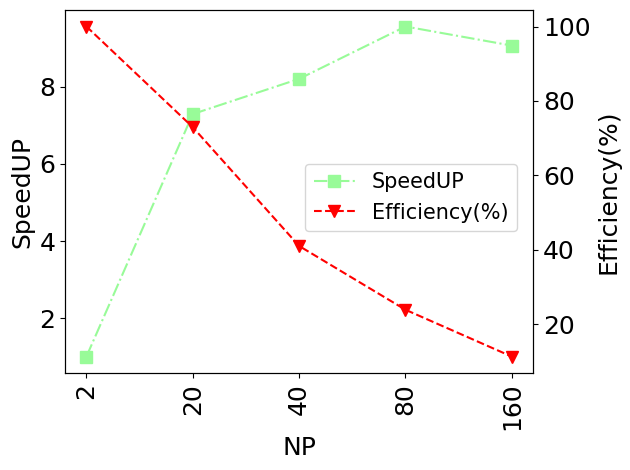

In [261]:
x = np.arange(len(processes))
f=plt.figure()
ax1=f.add_subplot(111)
ax2 = ax1.twinx()

#ax1.plot(x, values_tmp, color=colors_m[0], linestyle=linestyle_m[0], \
#        marker=markers_m[0], markersize=9, label="Time(s)")
# Tseq * NPseq / T(NP) * NP
ax2.plot(x, values_eff, color=colors_m[2], linestyle=linestyle_m[1], \
        marker=markers_m[1], markersize=9, label="Efficiency(%)")
ax1.plot(x, values_speedUP, color=colors_m[6], linestyle=linestyle_m[2], \
        marker=markers_m[2], markersize=9, label="SpeedUP")


ax1.set_xlabel("NP", fontsize=18)
ax1.set_ylabel("SpeedUP", fontsize=18)
ax1.set_xticks(x)
ax1.set_xticklabels(processes, rotation=90)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=18)
#ax1.set_yscale("log")


ax2.set_ylabel("Efficiency(%)", fontsize=18)
ax2.set_xticks(x)
ax2.set_xticklabels(processes, rotation=90)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='minor', labelsize=18)


f.legend(loc = 'upper center', bbox_to_anchor=(0.65, 0.67), fontsize=15,framealpha=0.8)
        
f.tight_layout()
f.savefig("Images/Escalability.eps", format="eps", dpi=300)

In [286]:
group = dfM.groupby(['ADR','NP','NC'])['T_Malleability']
grouped_aggTM = group.agg(['median', 'max', 'min', 'mean', 'std'])
grouped_aggTM['diff'] = grouped_aggTM['max'] - grouped_aggTM['min'] 

group = dfG.groupby(['ADR','Groups'])['T_total']
grouped_aggTG = group.agg(['median', 'max', 'min', 'mean', 'std'])
grouped_aggTG['diff'] = grouped_aggTG['max'] - grouped_aggTG['min'] 

In [292]:
grouped_aggTG['std'].max()

36.831434125500266

In [288]:
grouped_aggTM

median       max       min      mean       std      diff
ADR  NP  NC                                                             
0.0  2   20   1.386815  1.500213  1.285664  1.380103  0.089120  0.214549
         40   1.352518  1.405107  1.309934  1.352743  0.038679  0.095173
         80   1.552363  1.717585  1.512963  1.588385  0.086509  0.204622
         160  1.545332  1.620491  1.383113  1.537894  0.093260  0.237378
     20  2    1.187019  1.228658  1.163697  1.197470  0.026849  0.064961
         40   1.200833  1.568921  1.102279  1.266591  0.182103  0.466642
         80   1.278144  1.495369  1.133607  1.282079  0.135877  0.361762
         160  1.446389  1.526251  1.334121  1.439492  0.068825  0.192130
     40  2    3.017869  3.311731  2.941517  3.073791  0.142091  0.370214
         20   0.744247  1.261722  0.588635  0.822688  0.259126  0.673087
         80   1.350773  1.483774  1.073859  1.284786  0.179626  0.409915
         160  1.233166  1.613202  1.168281  1.305266  0.185352  0.444921
     80  2    2.552138  2.625532  2.519206  2.568119  0.044602  0.106326
         20   0.841091  1.068513  0.772204  0.896587  0.139668  0.296309
         40   0.553722  0.579855  0.442084  0.530922  0.053476  0.137771
         160  1.073713  1.092375  1.000113  1.064854  0.037375  0.092262
     160 2    2.621092  3.192883  2.449958  2.698321  0.285813  0.742925
         20   0.906410  1.006021  0.781511  0.908909  0.087088  0.224510
         40   0.550438  0.589202  0.448633  0.539910  0.055180  0.140569
         80   0.374157  0.468781  0.332985  0.389992  0.050869  0.135796
99.8 2   20   4.266167  4.348302  4.160952  4.254632  0.083417  0.187350
         40   4.137584  4.573572  4.070270  4.235135  0.203196  0.503302
         80   4.408637  5.959417  4.174433  4.706581  0.715716  1.784984
         160  7.202143  8.858385  5.396604  7.097851  1.673512  3.461781
     20  2    1.615390  1.633655  1.589369  1.613299  0.015843  0.044286
         40   1.580283  2.031760  1.533912  1.662959  0.208633  0.497848
         80   1.684443  1.894422  1.646058  1.713061  0.103529  0.248364
         160  1.784895  2.099191  1.636789  1.850411  0.195232  0.462402
     40  2    3.427925  3.570254  2.959413  3.360043  0.236997  0.610841
         20   0.905200  1.277939  0.870477  1.031889  0.199046  0.407462
         80   1.481095  1.674468  1.425972  1.536350  0.109718  0.248496
         160  1.592655  1.755178  1.524653  1.605453  0.090508  0.230525
     80  2    2.943196  3.192582  2.835068  2.959096  0.138915  0.357514
         20   1.031260  2.055346  0.919861  1.229794  0.470340  1.135485
         40   0.777016  0.874251  0.745737  0.792253  0.048723  0.128514
         160  1.490290  1.636510  1.415506  1.517726  0.103780  0.221004
     160 2    2.995985  3.198334  2.716226  2.968327  0.208920  0.482108
         20   1.304414  1.377826  1.022868  1.248793  0.142733  0.354958
         40   0.851172  1.068855  0.771764  0.878895  0.116779  0.297091
         80   0.730241  0.967627  0.632465  0.757442  0.128787  0.335162